# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing the data

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#To check whether th edata set contains any null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Ploting the Independent and dependent variable

Text(0, 0.5, 'Scores')

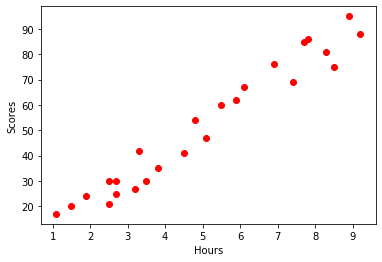

In [5]:
plt.scatter(df.Hours,df.Scores, color = 'red')
plt.xlabel('Hours')
plt.ylabel('Scores')

In [6]:
x = df['Hours'].values.reshape(-1,1)
y = df.Scores

# Spliting the data into train set and test set

In [7]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y = tts(x, y, test_size = 0.2)

# Implementing Linear Regression

In [8]:
#importing Linear Regression and metric mean square error

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics  import mean_absolute_error as mae

In [9]:
#Creating instance of Linear Regression

lr = LR(normalize = True)

#Fitting the model

lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [10]:
#Predicting over the Train Set and calculating error

train_pred = lr.predict(train_x)
k = mae(train_pred, train_y)
print('Training Mean Absolute Error', k)

Training Mean Absolute Error 5.084973257689138


Text(0.5, 1.0, 'Train prediction')

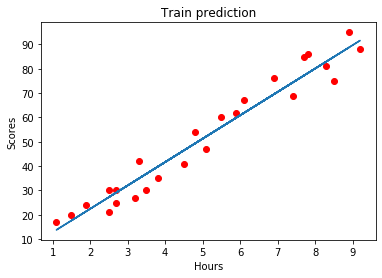

In [11]:
#Plotting Training Set with consideration of data

plt.scatter(x,y, color = 'red')
plt.plot(train_x, train_pred)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Train prediction')

In [12]:
#Predicting over the Test Set and calculating error

test_pred = lr.predict(test_x)
k = mae(test_pred, test_y)
print('Test Mean Absolute Error', k)

Test Mean Absolute Error 4.369136704836821


Text(0.5, 1.0, 'Test Prediction')

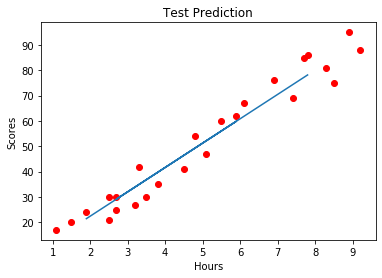

In [13]:
#Plotting Test Set with consideration of data

plt.scatter(x,y, color = 'red')
plt.plot(test_x, test_pred)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Test Prediction')

In [14]:
pd.DataFrame({'Actual': test_y,'Predicted': test_pred})

,Actual,Predicted
17,24,21.435105
11,62,59.888808
9,25,29.125845
1,47,52.198067
24,86,78.154316


In [15]:
#Testing with own data
hours = 9.25
own = lr.predict([[hours]])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own[0]))

No of Hours = 9.25
Predicted Score = 92.09378371793532
